## Unsupervised Learning

## K-Mean Clustering

In [31]:
#importing labraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
%matplotlib inline

In [32]:
#creating dataset
x , y = make_blobs(n_samples=1500,n_features=20, centers=5)

In [33]:
x

array([[ 2.05040606, -2.08707092, -1.50222892, ..., -4.11523955,
        -5.88805865,  3.27250671],
       [-0.79699874,  1.09180321,  6.32818046, ...,  2.17700591,
         1.7563511 ,  1.53397218],
       [ 3.14651411, -3.61505496, -1.76953629, ..., -1.74385396,
        -4.02591316,  4.06075793],
       ...,
       [-0.34032569,  8.27957123,  0.30086978, ...,  0.03210841,
         9.53426911,  5.4696447 ],
       [-0.32242428, -0.35653778,  6.78231115, ...,  1.93778889,
        -0.51711821,  1.81702995],
       [-3.25722464,  0.19883122,  1.64867104, ...,  0.63078652,
        -6.77503942, -2.35418827]])

In [34]:
y

array([1, 0, 1, ..., 4, 0, 3])

In [35]:
#splitting dataset into train and test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [36]:
#standardizing dataset
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [37]:
#applying pca
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [38]:
x_train_pca

array([[ 2.11782285,  2.72507005],
       [-3.29459615, -2.73857911],
       [-3.99081878, -2.74606342],
       ...,
       [ 0.27473436, -0.10303417],
       [-3.85570276, -2.82572261],
       [ 2.46827297,  3.08726808]])

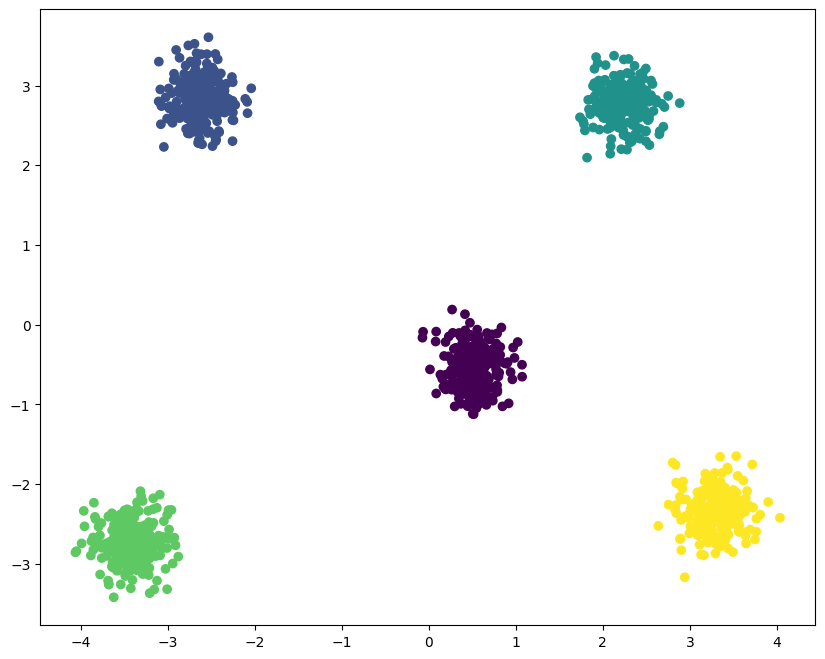

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [40]:
## elbow method to select k value

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_train_pca)
    wcss.append(kmeans.inertia_)

In [41]:
wcss

[15296.277145411565,
 8071.035716699695,
 4284.07960542752,
 1462.5156469055967,
 131.44097055015257,
 120.51090353674698,
 110.52245556119965,
 101.05752716302293,
 92.85053274024682,
 82.04930831934215]

Text(0, 0.5, 'WCSS')

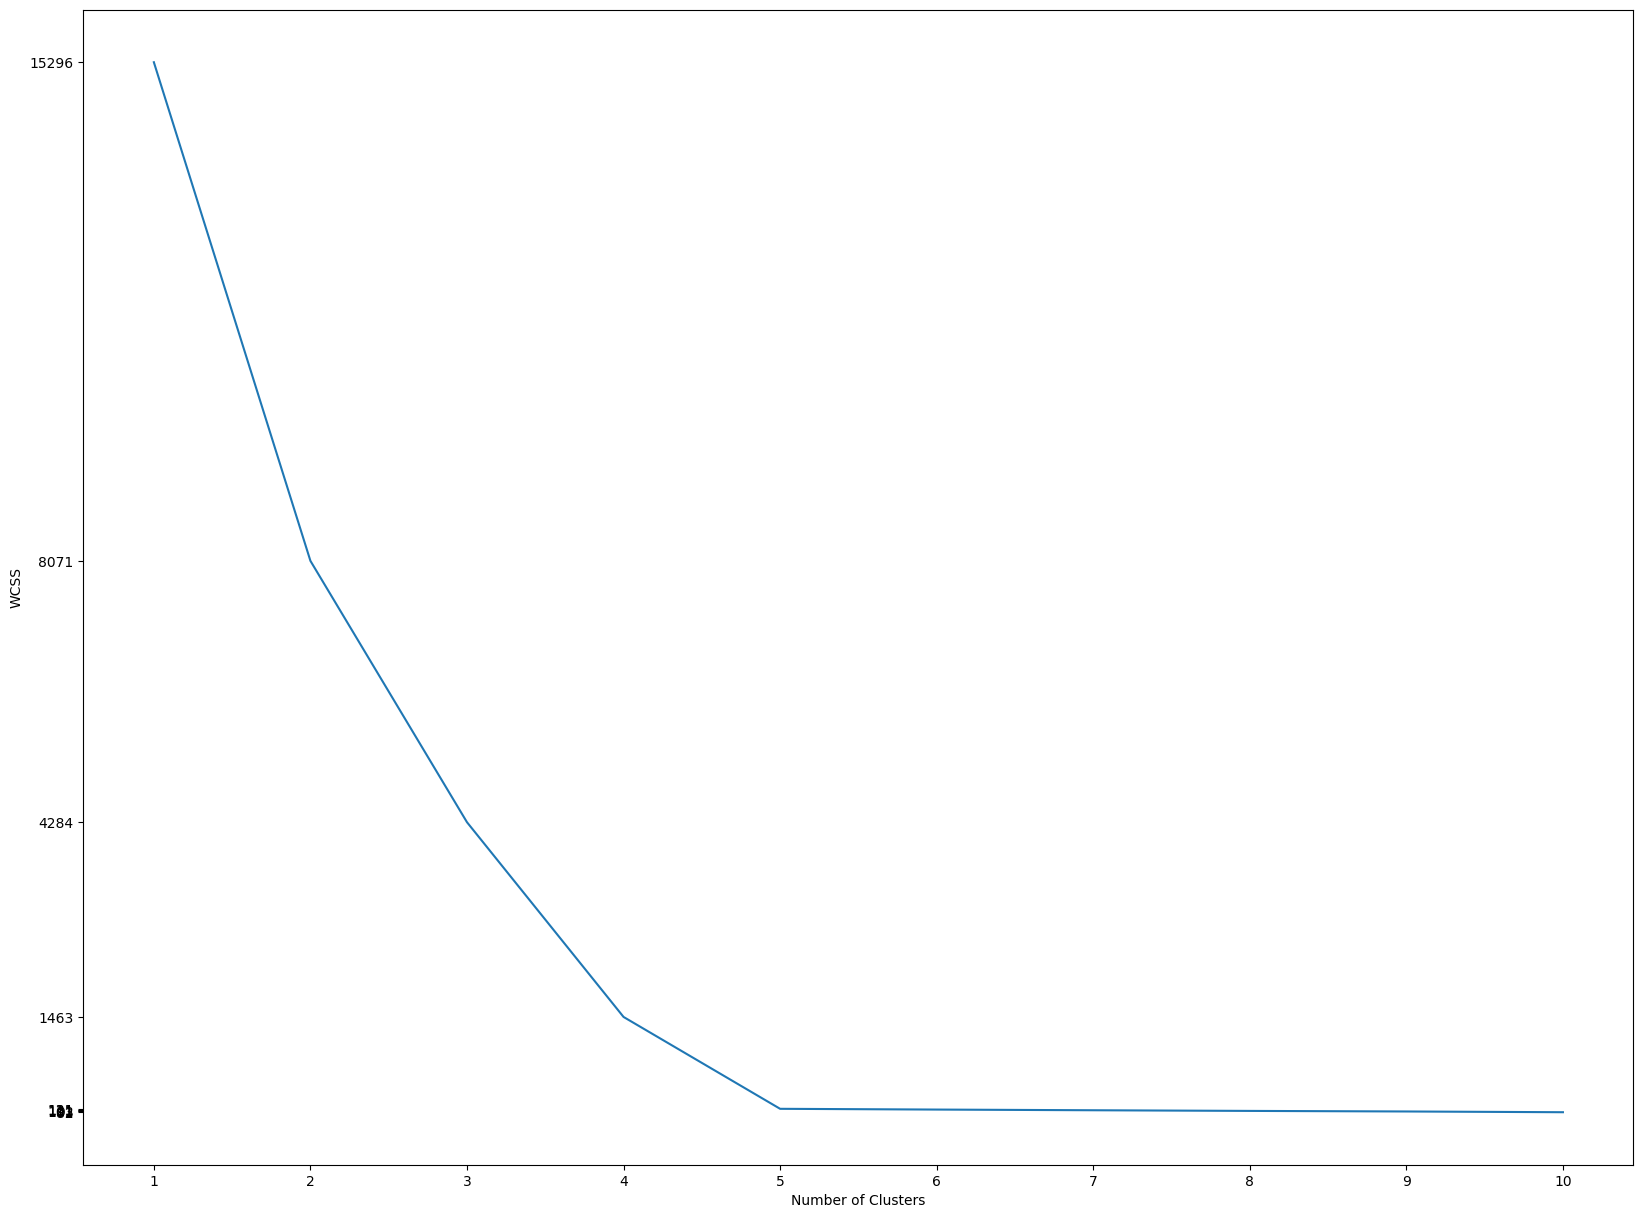

In [42]:
## ploting elbow curve
plt.figure(figsize=(20,15))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.yticks(wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


In [51]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(4)

In [52]:
##silhouette score
silhouette_coff=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_train_pca)
    score = silhouette_score(x_train_pca,kmeans.labels_)
    silhouette_coff.append(score)


In [53]:
silhouette_coff

[np.float64(0.509801316495102),
 np.float64(0.6230567246127341),
 np.float64(0.7749150778371418),
 np.float64(0.8910527463932105),
 np.float64(0.784051260552104),
 np.float64(0.6714585995012714),
 np.float64(0.562229477612051),
 np.float64(0.44900193687462053),
 np.float64(0.33960427119345804)]

Text(0, 0.5, 'silhouette_score')

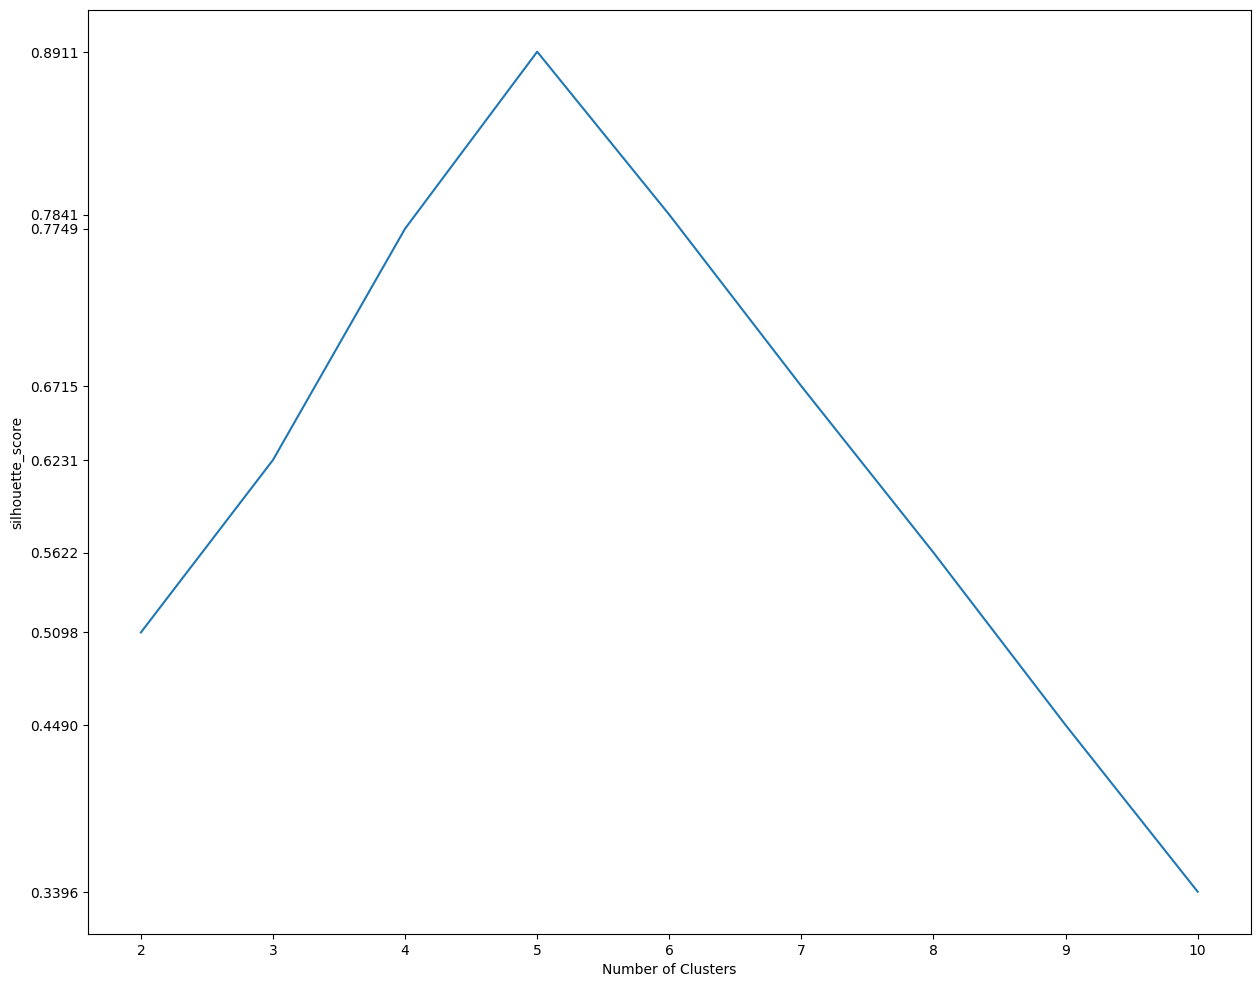

In [55]:
## ploting silhouette curve
plt.figure(figsize=(15,12))
plt.plot(range(2,11),silhouette_coff)
plt.xticks(range(2,11))
plt.yticks(silhouette_coff)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')

In [56]:
#silhouette score > kneelocator
#creating model based on silhouette score as it is more relaible

kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(x_train_pca)
y_pred = kmeans.predict(x_test_pca)


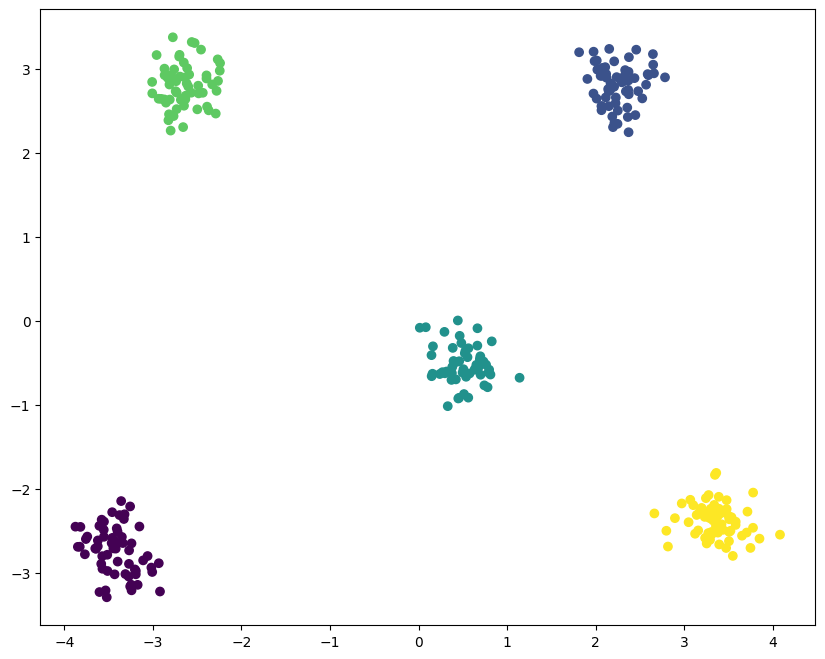

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_pca[:,0],x_test_pca[:,1],c=y_pred)

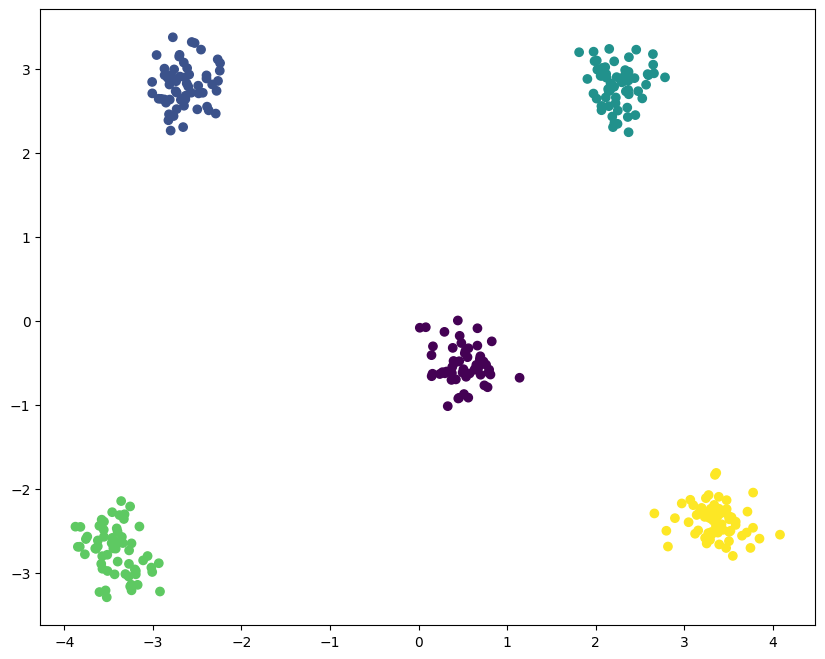

In [58]:
#checking for y_test
plt.figure(figsize=(10,8))
plt.scatter(x_test_pca[:,0],x_test_pca[:,1],c=y_test)